## Proyecto Final MCPP

#### Tipos de grafos

##### Grafos dirigidos y no dirigidos

La gran diferencia entre estos dos tipos de grafos es que los dirigidos especifican de que forma debo recorrer un grafo, es decir, existe un nodo inicial y uno final; mientras que en un grafo no dirigido no existe un orden específico en recorrer el grafo. (Ver presentación para mayor claridad).

In [126]:
### Librerías que uso para explicar un poco el funcionamiento de los grafos no dirigidos, implementando una clase
import itertools as it
import collections as co
### Libraría pickle me permite leer archivos en formato pkl
import pickle
###
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
### Librería que usare para crear grafos dirigidos
import networkx as nx
### Mapas en python
from IPython.display import display
import folium 
import webbrowser
### Random
from random import randint as rd
###
from functools import reduce 

La idea es crear dos clases, la primera yo defino un grafo no dirigido de las distintas estaciones del transmilenio, a su vez en esta clase podre crear los diferentes caminos que puedo tener para llegar de una estación a otra.

Para ello requiero definir diferentes conceptos:
#### Vecinos de un nodo
Son todos los nodos que estan conectados con un nodo específico.
#### Vecindades
Es un diccionario que consta de todos los nodos con sus respectivos vecinos.

##### Específicaciones dentro de la clase: estaciones_transmilenio_no_dirigido

- Los lados o conexiones estan dados por una lista: ["a","b"] en este caso los elementos son nodos, como aquí no importa el orden ["a","b"] es igual a ["b","a"].
- Los nodos los definiré con numeros.

In [5]:
### La clase no dirigido, me permite crear un grafo no dirigdo
class estaciones_transmilenio_no_dirigido:
    '''
    Creo un constructor: Para realizar el grafo este consta de las estaciones de transmilenio que 
    representan los nodos del grafo y los lados que son las conexiones que hay entre las diferentes 
    estaciones
    ''' 
    def __init__(self, nodos, lados):
        self.estaciones=nodos
        self.conexiones=lados
        # Agrego un nuevo atributo que será un diccionario de las vencidades 
        self.vecindades={}
    # Funcion que aplicamos en anteriores proyectos para crear vecindades
    def crearvecindades(self):
        if self.vecindades=={}: 
            # Recorro todas las conexiones posibles en las diferentes estaciones de transmilenio
            for j in self.conexiones:
                # Pregunto si el nodo en la posición 0 esta ya creado en las vecindades
                if j[0] in self.vecindades:
                    a=self.vecindades[j[0]]+(j[1],)
                    del self.vecindades[j[0]]
                    self.vecindades[j[0]]=a
                else:
                    self.vecindades[j[0]]=(j[1],)
                if j[1] in self.vecindades:
                    a=self.vecindades[j[1]]+(j[0],)
                    del self.vecindades[j[1]]
                    self.vecindades[j[1]]=a
                else:
                    self.vecindades[j[1]]=(j[0],)

Aca muestro el funcionamiento de la clase: Creo un grafo con 5 nodos y a su vez la union que hay entre los diferentes nodos.

In [6]:
a=estaciones_transmilenio_no_dirigido([1,2,3,4,5],[(1,2),(3,4),(4,5),(3,1)])
a.crearvecindades()
print(a.vecindades)


{2: (1,), 4: (3, 5), 5: (4,), 3: (4, 1), 1: (2, 3)}


Muestro el diccionario de como se generan las vecindades

### Creaciones de grafos dirigidos


Para poder crear un grafo dirigido usare la libreria "networkx"

Otras características que requieren este tipo de grafos para aplicar el algoritmo son las siguientes:

- Capacidad: Para explicar este concepto daré un ejemplo: Imaginemos una tubería, esta tiene un máximo de capacidad para que fluya el agua. Para el caso de transmilenio, para que la gente se transporte de una estación a otra el transmilenio cuenta con una capacidad máxima de personas en el trasnporte
- Flujo: Es la cantidad de personas que se encuentran actualmente dentro el transporte

Un apunte redundante es que es necesario tener en cuenta que el flujo no puede ser nunca mayor a la capacidad.

En los lados de un grafo se identifica a un nodo como cabeza o como cola, depende de la dirección del lado.

In [7]:
'''
Ejemplo de la creación de un grafo dirigido
'''
## Objeto grafo vacío
grafo = nx.DiGraph()
## Agregamos nodos al grafo
grafo.add_nodes_from('ABCDE')
## Agregamos los lados, asimismo con la capacidad correspondiente a cada lado y con un flujo igual a cero
grafo.add_edges_from([
    ('A', 'B', {'capacity': 4, 'flow': 0}),
    ('A', 'C', {'capacity': 5, 'flow': 0}),
    ('A', 'D', {'capacity': 7, 'flow': 0}),
    ('B', 'E', {'capacity': 7, 'flow': 0}),
    ('B', 'C', {'capacity': 7, 'flow': 0}),
    ('C', 'D', {'capacity': 6, 'flow': 0}),
    ('D', 'E', {'capacity': 8, 'flow': 0}),
])

Crearé una función que me permite graficar los grafos.

In [8]:
'''
El parametro grafo es el objeto grafo, mientras que el layout es un diccionario donde indico en que posicion me gustaría
mostrar los nodos.
'''
def grafico_grafo(grafo,layout):
    plt.figure(figsize=(20, 4))
    plt.axis('off')
    
    # Selecciono los nodos del grafo, los pintaré de color azul
    nx.draw_networkx_nodes(grafo, layout, node_color='steelblue', node_size=600)
    # Selecciono los lados del grafo, los pintaré de color gris
    nx.draw_networkx_edges(grafo, layout, edge_color='gray')
    # labels para los nodos
    nx.draw_networkx_labels(grafo, layout, font_color='white')
    
    # Con este 'for' indicare donde graficas los nodos y hare los labels del flujo y la capacidad
    for i, j, e in grafo.edges(data=True):
        # Formato en que estará el flujo y la capacidad
        label = '{}/{}'.format(e['flow'], e['capacity'])
        # Color del laber se pintará de color verde si el flujo es menor a la capacidad y rojo en otro caso
        color = 'green' if e['flow'] < e['capacity'] else 'red'
        x = layout[i][0] * .6 + layout[j][0] * .4
        y = layout[i][1] * .6 + layout[j][1] * .4
        t = plt.text(x, y, label, size=16, color=color, 
                     horizontalalignment='center', verticalalignment='center')
        
    plt.show()

In [9]:
# Layout del ejemplo realizado
layout = {
    'A': [0, 1], 'B': [1, 2], 'C': [1, 1], 'D': [1, 0],
    'E': [3, 1]
}

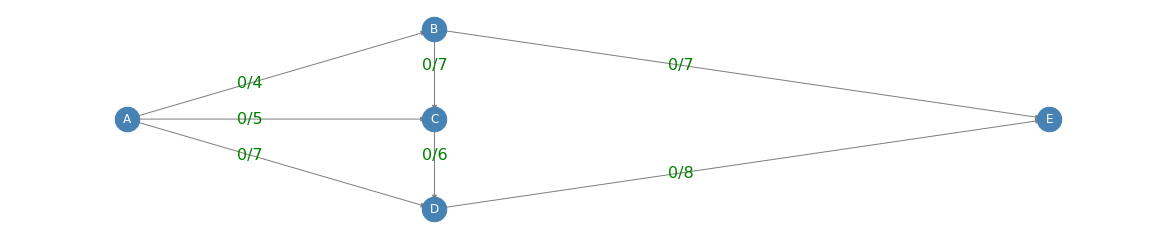

In [10]:
grafico_grafo(grafo,layout)

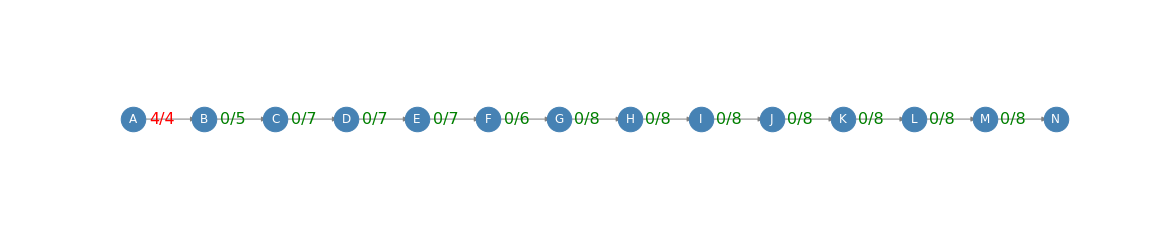

In [11]:
# Ejemplo de como se verían las estaciones de transmilenio de la 26 # Con ruta facil
'''
Portal dorado=A
Modelia=B
Normandia=C
AvRojas=D
Tiempo=E
Salitre=F
CAN=G
Gobernacion=H
QuintaParedes=I
Corferias=J
CiuUniver=K
ConcejoBogota=L
CentroMemoria=M
Universidades=N
'''
## Objeto grafo vacío
est26 = nx.DiGraph()
## Agregamos nodos al grafo
est26.add_nodes_from('ABCDEFGHIJKLMN')
## Agregamos los lados, asimismo con la capacidad correspondiente a cada lado y con un flujo igual a cero
est26.add_edges_from([
    ('A', 'B', {'capacity': 4, 'flow': 4}),
    ('B', 'C', {'capacity': 5, 'flow': 0}),
    ('C', 'D', {'capacity': 7, 'flow': 0}),
    ('D', 'E', {'capacity': 7, 'flow': 0}),
    ('E', 'F', {'capacity': 7, 'flow': 0}),
    ('F', 'G', {'capacity': 6, 'flow': 0}),
    ('G', 'H', {'capacity': 8, 'flow': 0}),
    ('H', 'I', {'capacity': 8, 'flow': 0}),
    ('I', 'J', {'capacity': 8, 'flow': 0}),
    ('J', 'K', {'capacity': 8, 'flow': 0}),
    ('K', 'L', {'capacity': 8, 'flow': 0}),
    ('L', 'M', {'capacity': 8, 'flow': 0}),
    ('M', 'N', {'capacity': 8, 'flow': 0}),
])
## Layout de este grafo
layout_26 = {
    'A': [0, 1], 'B': [1, 1], 'C': [2, 1], 'D': [3, 1],
    'E': [4, 1], 'F': [5, 1], 'G': [6, 1], 'H': [7, 1],
    'I': [8, 1], 'J': [9, 1], 'K': [10, 1], 'L': [11, 1],
    'M': [12, 1], 'N': [13, 1]
}
grafico_grafo(est26,layout_26)

### Algoritmo Ford-Fulkerson

Este algoritmo me permite encontrar la forma óptima de que el flujo corra de manera máxima a través de la red. Para empezar hay que tener en cuenta diferentes aspectos para poder aplicar el algoritmo:

- Fuente: Nodo donde inicia el flujo a correr.
- Desague: Nodo final, donde termina el flujo.

Para el caso del transmilenio, una cierta cantidad de personas parten de una estación y buscan llegar a otra. Entonces la intención de este proyecto es: Primero, generar una simulación aleatoria del funcionamiento del algoritmo; Segundo, poder utilizar la encuesta de movilidad para poder ver como se mueve la gente en la ciudad, es decir, de donde parten y para donde van. De esta manera, se crearía una política que optimice los transmilenios en funcionamiento y tambien evidenciar si es necesario tener mas líneas de transporte.

In [17]:
def busqueda_profunda(grafo, fuente, desague):
    # Convierto el grafo a uno no dirigido
    no_dirigido = grafo.to_undirected()
    # Nodos que voy revisando
    # Empiezo con el nodo fuente
    explorados = {fuente}
    #
    stack = [(fuente, 0, dict(no_dirigido[fuente]))]
    #
    print(stack)
    
    while stack:
        v, _, vecinos = stack[-1]
        if v == desague:
            break
        
        # search the next neighbour
        while vecinos:
            u, e = vecinos.popitem()
            if u not in explorados:
                break
        else:
            stack.pop()
            continue
        
        # current flow and capacity
        direccion = grafo.has_edge(v, u)
        capacidad = e['capacity']
        flujo = e['flow']
        vecinos = dict(no_dirigido[u])

        # increase or redirect flow at the edge
        if direccion and flujo < capacidad:
            stack.append((u, capacidad - flujo, vecinos))
            explorados.add(u)
        elif not direccion and flujo:
            stack.append((u, flujo, vecinos))
            explorados.add(u)

    # (source, sink) path and its flow reserve
    reserve = min((f for _, f, _ in stack[1:]), default=0)
    path = [v for v, _, _ in stack]
    
    return path, reserve

def ford_fulkerson(grafo, fuente, desague, debug=None):
    flujo=0
    camino=True
    
    while camino:
        # search for path with flow reserve
        camino, reserva = busqueda_profunda(grafo, fuente, desague)
        flujo += reserva

        # increase flow along the path
        for v, u in zip(camino, camino[1:]):
            if grafo.has_edge(v, u):
                grafo[v][u]['flow'] += reserva
            else:
                grafo[u][v]['flow'] -= reserva
        
        # show intermediate results
        if callable(debug):
            debug(grafo, camino, reserva, flujo)

def flow_debug(graph, path, reserve, flow):
    print('flow increased by', reserve, 
          'at path', path,
          '; current flow', flow)
    grafico_grafo(est26,layout_26)

[('A', 0, {'B': {'capacity': 4, 'flow': 4}})]
flow increased by 0 at path [] ; current flow 0


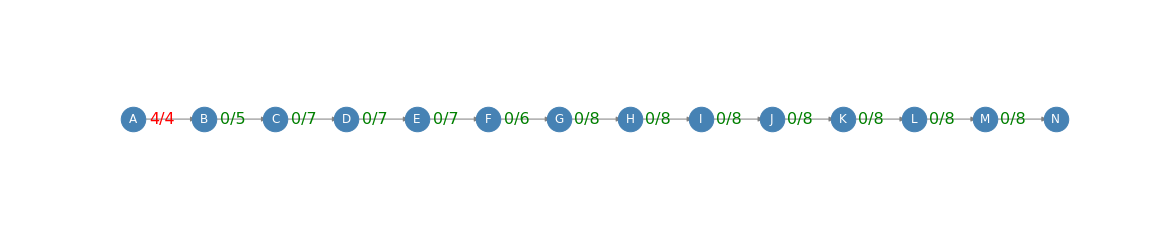

In [16]:
ford_fulkerson(est26, 'A', 'N', flow_debug)

In [14]:

graph = nx.DiGraph()
graph.add_nodes_from('ABCDEFGH')
graph.add_edges_from([
    ('A', 'B', {'capacity': 4, 'flow': 0}),
    ('A', 'C', {'capacity': 5, 'flow': 0}),
    ('A', 'D', {'capacity': 7, 'flow': 0}),
    ('B', 'E', {'capacity': 7, 'flow': 0}),
    ('C', 'E', {'capacity': 6, 'flow': 0}),
    ('C', 'F', {'capacity': 4, 'flow': 0}),
    ('C', 'G', {'capacity': 1, 'flow': 0}),
    ('D', 'F', {'capacity': 8, 'flow': 0}),
    ('D', 'G', {'capacity': 1, 'flow': 0}),
    ('E', 'H', {'capacity': 7, 'flow': 0}),
    ('F', 'H', {'capacity': 6, 'flow': 0}),
    ('G', 'H', {'capacity': 4, 'flow': 0}),
])
layout = {
    'A': [0, 1], 'B': [1, 2], 'C': [1, 1], 'D': [1, 0],
    'E': [2, 2], 'F': [2, 1], 'G': [2, 0], 'H': [3, 1],
}

# Encuesta de movilidad 2015


El propósito de uso de esta encuesta es encontrar a donde y de que sitio se movilizan más los ciudadanos bogotanos

In [2]:
pkl = open('encuesta.pkl', 'rb')
data = pickle.load(pkl)
pkl.close()

In [7]:
# Se revisan las diferentes variables de la tabla
print(data.columns)
# tamaño de la encuesta
print("Tamaño de la encuesta:",len(data))

Index(['ID_ENCUESTA', 'NUMERO_PERSONA', 'NUMERO_VIAJE', 'MOTIVOVIAJE',
       'HORA_INICIO', 'HORA_FIN', 'MEDIO_PREDOMINANTE', 'ZAT_DESTINO',
       'ZAT_ORIGEN', 'DEPARTAMENTO_ORIGEN', 'DEPARTAMENTO_DESTINO',
       'DIFERENCIA_HORAS', 'DIA_HABIL', 'DIA_NOHABIL', 'PICO_HABIL',
       'PICO_NOHABIL', 'VALLE_NOHABIL', 'VALLE_HABIL', 'FE_TOTAL_viajes',
       'FACTOR_AJUSTE_TRANSMILENIO', 'PONDERADOR_CALIBRADO_VIAJES',
       'longitude_o', 'latitude_o', 'longitude_d', 'latitude_d', 'BARRIO',
       'NUMERO_HOGARES', 'NUMERO_PERSONAS', 'ESTRATO', 'DEPARTAMENTO',
       'ZAT_HOGAR', 'PONDERADOR_CALIBRADO_viajes', 'FACTOR_AJUSTE_viajes',
       'FE_TOTAL_encuesta', 'SEXO', 'EDAD', 'PONDERADOR_CALIBRADO_personas',
       'FACTOR_AJUSTE_personas', 'FE_TOTAL'],
      dtype='object')
Tamaño de la encuesta: 144950


Las variables que me permiten ver a donde va la gente y de donde vienen son: ZAT_DESTINO Y ZAT ORIGEN

In [36]:
origen=data["ZAT_ORIGEN"]
destino=data["ZAT_DESTINO"]
parejas=[]
barrios={}
# Voy a crear parejas de datos es decir hacia donde van y y hacia donde se dirigen 
# Asimismo creare un diccionario de todos los barrios con su ZAT, longitud y latitud
for i in range(0,len(data)):
    par=str(origen[i])+'-'+str(destino[i])
    parejas.append(par)
    # creacion de 'barrios'
    bar=data['BARRIO'][i]
    if origen[i] not in barrios:
        barrios[origen[i]]=[bar,data["longitude_o"][i],data["latitude_o"][i]]
print(parejas)

['566-238', '238-566', '566-564', '564-566', '227-138', '138-227', '227-239', '239-227', '546-385', '385-546', '546-385', '385-546', '546-548', '548-546', '570-534', '534-570', '570-842', '842-570', '570-850', '850-570', '533-288', '288-533', '533-590', '590-533', '411-308', '308-411', '411-40', '40-411', '522-596', '596-522', '522-27', '27-522', '413-290', '290-413', '413-275', '275-413', '413-291', '291-413', '413-413', '413-413', '193-340', '340-193', '565-993', '993-565', '522-523', '523-522', '522-523', '523-522', '522-523', '523-522', '417-418', '418-417', '522-410', '410-522', '522-522', '522-522', '522-417', '417-522', '417-255', '255-417', '417-849', '849-417', '522-130', '130-522', '522-241', '241-522', '522-241', '241-522', '522-849', '849-522', '522-849', '849-522', '522-418', '418-522', '522-849', '849-522', '411-900', '900-411', '411-557', '557-411', '412-396', '396-412', '417-87', '87-417', '527-275', '275-527', '527-275', '275-527', '412-552', '552-412', '554-951', '951

In [37]:
# Ejemplo barrio chapinero
print ("Diccionario de barrios: ", barrios[440])

Diccionario de barrios:  ['pedregal', 4.604674242780001, -74.0896999103]


In [4]:
'''
Ahora realizaré un conteo de la anterior lista, crearé un diccionario para ello
'''
viajes={}
for i in parejas:
    # Pregunto si la pareja esta en el diccionario
    if i in viajes:
        # Sumo uno a la cantidad actual
        viajes[i]=viajes[i]+1
    # sino la creo
    else:
        viajes[i]=1
print(viajes)

{'566-238': 1, '238-566': 1, '566-564': 5, '564-566': 5, '227-138': 1, '138-227': 1, '227-239': 1, '239-227': 1, '546-385': 2, '385-546': 2, '546-548': 1, '548-546': 1, '570-534': 1, '534-570': 1, '570-842': 1, '842-570': 1, '570-850': 1, '850-570': 1, '533-288': 1, '288-533': 1, '533-590': 1, '590-533': 1, '411-308': 1, '308-411': 1, '411-40': 1, '40-411': 1, '522-596': 1, '596-522': 1, '522-27': 1, '27-522': 1, '413-290': 1, '290-413': 1, '413-275': 2, '275-413': 1, '413-291': 1, '291-413': 1, '413-413': 26, '193-340': 1, '340-193': 1, '565-993': 1, '993-565': 1, '522-523': 8, '523-522': 8, '417-418': 1, '418-417': 1, '522-410': 5, '410-522': 4, '522-522': 10, '522-417': 3, '417-522': 4, '417-255': 1, '255-417': 1, '417-849': 1, '849-417': 1, '522-130': 1, '130-522': 1, '522-241': 2, '241-522': 2, '522-849': 3, '849-522': 3, '522-418': 6, '418-522': 7, '411-900': 2, '900-411': 2, '411-557': 7, '557-411': 7, '412-396': 2, '396-412': 2, '417-87': 1, '87-417': 1, '527-275': 2, '275-527'

Creare un grafo en que sitios se transforman las personas

In [5]:
transporte=nx.DiGraph()
# Recorro el diccionario
for i in viajes:
    # Creo listas temporales donde separo el origen del destino
    temp_list=i.split('-')
    transporte.add_edge(temp_list[0],temp_list[1],weight=viajes[i])

Para mirar que los sitios donde mas se transportan las personas miro los grados de cada uno de los nodos. El grado de un nodo es cuentas lados salen de un nodo.

In [6]:
grados=[]
# En el diccionario viajes puedo encontrar la informacion de los grados
for i in viajes:
    grados.append(viajes[i])
# Organizamos de mayor a menor
grados=sorted(grados,reverse=True)
print(grados)

[5264, 4905, 4592, 2373, 2366, 2319, 1983, 1914, 1898, 1768, 1627, 1582, 1552, 1375, 1291, 1162, 484, 483, 288, 287, 258, 253, 233, 232, 212, 209, 209, 203, 196, 193, 181, 151, 151, 148, 145, 136, 135, 134, 131, 130, 128, 127, 114, 113, 112, 101, 100, 99, 96, 92, 90, 90, 90, 87, 85, 84, 80, 76, 76, 74, 74, 70, 70, 70, 69, 69, 67, 66, 66, 66, 65, 65, 65, 64, 64, 62, 62, 62, 61, 60, 60, 57, 57, 56, 55, 54, 53, 51, 51, 50, 50, 50, 50, 49, 49, 48, 46, 46, 45, 44, 43, 43, 43, 42, 41, 41, 41, 41, 41, 41, 40, 40, 40, 40, 39, 39, 39, 38, 38, 38, 38, 37, 37, 37, 36, 36, 35, 35, 35, 34, 34, 34, 33, 32, 32, 32, 32, 31, 31, 31, 31, 31, 30, 30, 30, 30, 29, 29, 29, 29, 29, 29, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 26, 26, 26, 26, 26, 26, 26, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 23, 23, 23, 23, 23, 23, 23, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 

In [151]:
# Vamos a determinar barrios a los que llega mas gente y de donde salen mas
salen_mas={}
donde_mas={}
for i in viajes:
    pal=i.split('-')
    ## Primero de donde salen mas
    info=barrios[int(pal[0])]
    if int(pal[0]) not in salen_mas:
        salen_mas[int(pal[0])]=[info,[1]]
    else:
        salen_mas[int(pal[0])][-1][0]+=1
    info_2=barrios[int(pal[1])]
    ## Hacia donde van mas
    if int(pal[1]) not in donde_mas:
        donde_mas[int(pal[1])]=[info_2,[1]]
    else:
        donde_mas[int(pal[1])][-1][0]+=1

In [149]:
print(salen_mas)
print(donde_mas)

{566: [['chapinero', 4.61181237651, -74.1911501938, 1, 1], [31]], 238: [['chapinero', 4.65213412914, -74.0688207829, 1, 1], [64]], 564: [['chapinero', 4.61580465624, -74.1882567514], [61]], 227: [['7 de agosto', 4.6595128386599995, -74.0752101553], [29]], 138: [['7 de agosto', 4.69577847002, -74.0660537227], [108]], 239: [['7 de agosto', 4.65272279508, -74.06549616560001], [149]], 546: [['prados de kennedy', 4.6110047967800005, -74.1706295179], [80]], 385: [['prados de kennedy', 4.63449044378, -74.1226425104], [131]], 548: [['prados de kennedy', 4.6155743869, -74.1799522297], [55]], 570: [['ruby 1 sector', 4.60991805054, -74.2094367414], [29]], 534: [['ruby 1 sector', 4.61541151502, -74.1661401749], [19]], 842: [['ruby 1 sector', 4.67630372882, -74.0892078368], [114]], 850: [['ruby 1 sector', 4.68871051651, -74.04940118020001], [120]], 533: [['chapinero', 4.61665989869, -74.1693034116], [64]], 288: [['chapinero', 4.638117525169999, -74.0779415344], [163]], 590: [['chapinero', 4.5777182

In [92]:
## Lista de todas las variables
## Data frame de donde salen mas
ite=list(salen_mas.items())
definitivo=[]
for i in ite:
    # Convertir lista de listas en una sola
    temp=list(it.chain.from_iterable(i[1]))
    temp_l=[i[0]]+temp
    definitivo.append(temp_l)
tabla=pd.DataFrame(definitivo, columns=['ZAT', 'BARRIO','LON','LAT','COUNT','NA','NA'])
tabla

ZAT                         BARRIO       LON        LAT  COUNT   NA    NA
0    566                      chapinero  4.611812 -74.191150      1  1.0  31.0
1    238                      chapinero  4.652134 -74.068821      1  1.0  64.0
2    564                      chapinero  4.615805 -74.188257     61  NaN   NaN
3    227                    7 de agosto  4.659513 -74.075210     29  NaN   NaN
4    138                    7 de agosto  4.695778 -74.066054    108  NaN   NaN
5    239                    7 de agosto  4.652723 -74.065496    149  NaN   NaN
6    546              prados de kennedy  4.611005 -74.170630     80  NaN   NaN
7    385              prados de kennedy  4.634490 -74.122643    131  NaN   NaN
8    548              prados de kennedy  4.615574 -74.179952     55  NaN   NaN
9    570                  ruby 1 sector  4.609918 -74.209437     29  NaN   NaN
10   534                  ruby 1 sector  4.615412 -74.166140     19  NaN   NaN
11   842                  ruby 1 sector  4.676304 -74.089208    114  NaN   NaN
12   850                  ruby 1 sector  4.688711 -74.049401    120  NaN   NaN
13   533                      chapinero  4.616660 -74.169303     64  NaN   NaN
14   288                      chapinero  4.638118 -74.077942    163  NaN   NaN
15   590                      chapinero  4.577718 -74.101942     48  NaN   NaN
16   411                   patio bonito  4.638863 -74.161455     80  NaN   NaN
17   308                   patio bonito  4.701238 -74.165609      5  NaN   NaN
18    40                   patio bonito  4.751013 -74.099005     85  NaN   NaN
19   522                 supermanzana 7  4.620523 -74.148028    110  NaN   NaN
20   596                 supermanzana 7  4.566569 -74.089421     50  NaN   NaN
21    27                 supermanzana 7  4.757808 -74.052036    155  NaN   NaN
22   413              patio bonito unir  4.648669 -74.168918    120  NaN   NaN
23   290              patio bonito unir  4.647595 -74.082384    146  NaN   NaN
24   275              patio bonito unir  4.644568 -74.063461    248  NaN   NaN
25   291              patio bonito unir  4.649185 -74.079588     57  NaN   NaN
26   193                           unir  4.721587 -74.140873     31  NaN   NaN
27   340                           unir  4.629633 -74.076625    102  NaN   NaN
28   565                    clarelandia  4.610161 -74.182310     78  NaN   NaN
29   993                    clarelandia  4.608369 -74.071738    119  NaN   NaN
..   ...                            ...       ...        ...    ...  ...   ...
850  694       sotavento segundo sector  4.521229 -74.090152      5  NaN   NaN
851  722                    divino nino  4.533303 -74.152986      4  NaN   NaN
852    2                    potrerillos  4.819367 -74.065790      1  NaN   NaN
853  159  san luis km 4 5 via la calera  4.673011 -74.018134      1  NaN   NaN
854  478                         guavio  4.600580 -74.061897      5  NaN   NaN
855  712        compartir san francisco  4.556467 -74.150091      6  NaN   NaN
856  940               juan jose rondon  4.559687 -74.150705     25  NaN   NaN
857  670               juan jose rondon  4.563636 -74.153140     10  NaN   NaN
858  491                       galerias  4.579579 -74.076635      8  NaN   NaN
859  789                    los angeles  4.547518 -74.233711      6  NaN   NaN
860  835                         alamos  4.709226 -74.131617     47  NaN   NaN
861  775                      san mateo  4.583432 -74.197352     67  NaN   NaN
862  787                      santa ana  4.568920 -74.244431    164  NaN   NaN
863  769                        ducales  4.574652 -74.179262     47  NaN   NaN
864  931        tierra grande 3 etapa 1  4.590635 -74.212767     20  NaN   NaN
865  780                    san ignacio  4.573069 -74.210278     26  NaN   NaN
866  770                     bellavista  4.565148 -74.182797     40  NaN   NaN
867  783            santa helena soacha  4.586362 -74.228587     30  NaN   NaN
868  772                       el oasis  4.571350 -74.1

In [165]:
## Data frame de donde llegan mas
ite_2=list(donde_mas.items())
definitivo_donde=[]
for i in ite_2:
    # Convertir lista de listas en una sola
    temp=list(it.chain.from_iterable(i[1]))
    temp_l=[i[0]]+temp
    definitivo_donde.append(temp_l)
tabla_donde=pd.DataFrame(definitivo_donde, columns=['ZAT', 'BARRIO','LON','LAT','COUNT','NA','NA'])
tabla_donde

ZAT                         BARRIO       LON        LAT  COUNT   NA    NA
0    238                      chapinero  4.652134 -74.068821      1  1.0  63.0
1    566                      chapinero  4.611812 -74.191150      1  1.0  28.0
2    564                      chapinero  4.615805 -74.188257     61  NaN   NaN
3    138                    7 de agosto  4.695778 -74.066054    109  NaN   NaN
4    227                    7 de agosto  4.659513 -74.075210     30  NaN   NaN
5    239                    7 de agosto  4.652723 -74.065496    153  NaN   NaN
6    385              prados de kennedy  4.634490 -74.122643    129  NaN   NaN
7    546              prados de kennedy  4.611005 -74.170630     80  NaN   NaN
8    548              prados de kennedy  4.615574 -74.179952     57  NaN   NaN
9    534                  ruby 1 sector  4.615412 -74.166140     18  NaN   NaN
10   570                  ruby 1 sector  4.609918 -74.209437     29  NaN   NaN
11   842                  ruby 1 sector  4.676304 -74.089208    116  NaN   NaN
12   850                  ruby 1 sector  4.688711 -74.049401    118  NaN   NaN
13   288                      chapinero  4.638118 -74.077942    163  NaN   NaN
14   533                      chapinero  4.616660 -74.169303     65  NaN   NaN
15   590                      chapinero  4.577718 -74.101942     47  NaN   NaN
16   308                   patio bonito  4.701238 -74.165609      5  NaN   NaN
17   411                   patio bonito  4.638863 -74.161455     76  NaN   NaN
18    40                   patio bonito  4.751013 -74.099005     83  NaN   NaN
19   596                 supermanzana 7  4.566569 -74.089421     51  NaN   NaN
20   522                 supermanzana 7  4.620523 -74.148028    111  NaN   NaN
21    27                 supermanzana 7  4.757808 -74.052036    157  NaN   NaN
22   290              patio bonito unir  4.647595 -74.082384    144  NaN   NaN
23   413              patio bonito unir  4.648669 -74.168918    118  NaN   NaN
24   275              patio bonito unir  4.644568 -74.063461    246  NaN   NaN
25   291              patio bonito unir  4.649185 -74.079588     56  NaN   NaN
26   340                           unir  4.629633 -74.076625    103  NaN   NaN
27   193                           unir  4.721587 -74.140873     28  NaN   NaN
28   993                    clarelandia  4.608369 -74.071738    122  NaN   NaN
29   565                    clarelandia  4.610161 -74.182310     78  NaN   NaN
..   ...                            ...       ...        ...    ...  ...   ...
850  694       sotavento segundo sector  4.521229 -74.090152      5  NaN   NaN
851  722                    divino nino  4.533303 -74.152986      4  NaN   NaN
852    2                    potrerillos  4.819367 -74.065790      1  NaN   NaN
853  159  san luis km 4 5 via la calera  4.673011 -74.018134      1  NaN   NaN
854  478                         guavio  4.600580 -74.061897      5  NaN   NaN
855  712        compartir san francisco  4.556467 -74.150091      5  NaN   NaN
856  940               juan jose rondon  4.559687 -74.150705     26  NaN   NaN
857  670               juan jose rondon  4.563636 -74.153140      8  NaN   NaN
858  491                       galerias  4.579579 -74.076635      8  NaN   NaN
859  789                    los angeles  4.547518 -74.233711      6  NaN   NaN
860  775                      san mateo  4.583432 -74.197352     67  NaN   NaN
861  787                      santa ana  4.568920 -74.244431    156  NaN   NaN
862  769                        ducales  4.574652 -74.179262     47  NaN   NaN
863  931        tierra grande 3 etapa 1  4.590635 -74.212767     19  NaN   NaN
864  780                    san ignacio  4.573069 -74.210278     22  NaN   NaN
865  770                     bellavista  4.565148 -74.182797     39  NaN   NaN
866  783            santa helena soacha  4.586362 -74.228587     34  NaN   NaN
867  772                       el oasis  4.571350 -74.184984     36  NaN   NaN
868  933                  ciudad jardin  4.593650 -74.2

## Mapa

Usaré la libreria folium para crear el mapa, busco las longitud y latitud de Colombia para poder realizarlo

In [168]:
latitude = 4.6471
longitude = -74.0906
tra = folium.Map(location=[latitude, longitude], zoom_start=11)
#tiles="CartoDB dark_matter"

tra

In [141]:
for i in range(0,len(tabla)):
    folium.Circle(
      location=[tabla.iloc[i]['LON'], tabla.iloc[i]['LAT']],
      popup=tabla.iloc[i]['BARRIO'],
      radius=tabla.iloc[i]['COUNT']*0.5,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(tra)
tra

In [154]:
'''
Para que muestre por separado los colores es necesario correr el codigo de creacion del mapa unicamente
'''
for i in range(0,len(tabla_donde)):
    folium.Circle(
      location=[tabla.iloc[i]['LON'], tabla.iloc[i]['LAT']],
      popup=tabla.iloc[i]['BARRIO'],
      radius=tabla.iloc[i]['COUNT']*0.5,
      color='blueviolet',
      fill=True,
      fill_color='blueviolet'
   ).add_to(tra)
tra

In [169]:
'''
 En este colorare si el ZAT llega mas gente sera violeta y en caso de que salga mas gente lo pintare de rojo
 Pintare solo los stios que aparezcan mas de 200 veces
'''
for i in range(0,len(tabla)):
    if tabla.iloc[i]['COUNT']>tabla_donde.iloc[i]['COUNT'] and tabla.iloc[i]['COUNT']>200:
        co='crimson'
        radio=tabla.iloc[i]['COUNT']*0.5
    elif tabla.iloc[i]['COUNT']<=tabla_donde.iloc[i]['COUNT'] and tabla_donde.iloc[i]['COUNT']>200:
        co='blueviolet'
        radio=tabla_donde.iloc[i]['COUNT']*0.5
    elif tabla.iloc[i]['COUNT']<200 or tabla_donde.iloc[i]['COUNT']<200:
        radio=0
    folium.Circle(
      location=[tabla.iloc[i]['LON'], tabla.iloc[i]['LAT']],
      popup=tabla.iloc[i]['BARRIO'],
      radius=radio,
      color=co,
      fill=True,
      fill_color='crimson'
   ).add_to(tra)
tra